# Parameterized Quantum Circuit

In [ ]:
from qiskit import QuantumCircuit, execute, Aer, QuantumRegister, ClassicalRegister
from qiskit.visualization import plot_histogram, plot_bloch_multivector

Parametryzowane algorytmy kwantowe, czyli takie w których realizujemy obwody przez bramki parametryzowane (liczbami) są podstawowym budulcem algorytmów kwantowego uczenia maszynowego. 
Bardzo często mozna się spotkać z innymi nazwami: `parameterized trial states`, `variational forms`, lub `ansatzes`.

Ponizszy przykład przedstawia obwód z dwoma bramkami parametryzowanymi jedną liczbą $\theta$.
Do oznaczenia parametru wykorzystano obiekt `Parameter`.

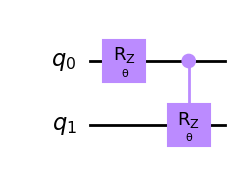

In [2]:
from qiskit.circuit import QuantumCircuit, Parameter

theta = Parameter('θ')

qc = QuantumCircuit(2)
qc.rz(theta, 0)
qc.crz(theta, 0, 1)
qc.draw('mpl')

Jezeli chcemy zastosować wiele parametrów dla róznych bramek mozemy uzyc klasy kilku obiektów na podstawie klasy `Parameters` lub zastosować klasę `ParameterVector`.

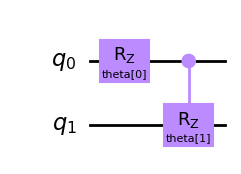

In [6]:
from qiskit.circuit import ParameterVector
theta_list = ParameterVector('theta', length=2)

qc = QuantumCircuit(2)
qc.rz(theta_list[0], 0)
qc.crz(theta_list[1], 0, 1)
qc.draw('mpl')

Skąd wziąć informacje jak powinny wyglądać obwody w zagadnieniach kwantowego uczenia maszynowego? 

W ogólności realizowane jest to w formie testowej [sprwadz publikację](https://arxiv.org/abs/1905.10876). 

Przetestujmy dwa parametryczne obwody i zobaczmy jakie mozliwosci kodowania stanów one reprezentują.

### Exploring expressibility

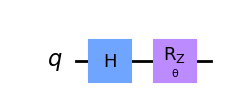

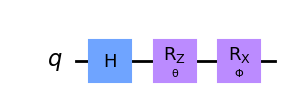

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# First, we need to define the circuits:
theta_param = Parameter('θ')
phi_param = Parameter('Φ')

# Circuit A
qc_A = QuantumCircuit(1)
qc_A.h(0)
qc_A.rz(theta_param, 0)
display(qc_A.draw('mpl'))
# Circuit B
qc_B = QuantumCircuit(1)
qc_B.h(0)
qc_B.rz(theta_param, 0)
qc_B.rx(phi_param, 0)
display(qc_B.draw('mpl'))

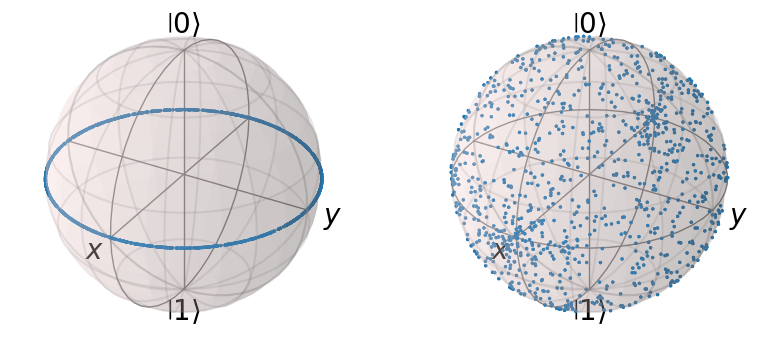

In [10]:
# Next we uniformly sample the parameter space for the two parameters theta and phi
np.random.seed(0)
num_param = 1000
theta = [2*np.pi*np.random.uniform() for i in range(num_param)]
phi = [2*np.pi*np.random.uniform() for i in range(num_param)]

# Then we take the parameter value lists, build the state vectors corresponding
# to each circuit, and plot them on the Bloch sphere:
from qiskit.visualization.bloch import Bloch
from qiskit.quantum_info import Statevector

def state_to_bloch(state_vec):
    # Converts state vectors to points on the Bloch sphere
    phi = np.angle(state_vec.data[1])-np.angle(state_vec.data[0])
    theta = 2*np.arccos(np.abs(state_vec.data[0]))
    return [np.sin(theta)*np.cos(phi),np.sin(theta)*np.sin(phi),np.cos(theta)]

# Bloch sphere plot formatting
width, height = plt.figaspect(1/2)
fig=plt.figure(figsize=(width, height))
ax1, ax2 = fig.add_subplot(1, 2, 1, projection='3d'), fig.add_subplot(1, 2, 2, projection='3d')
b1,b2 = Bloch(axes=ax1), Bloch(axes=ax2)
b1.point_color, b2.point_color = ['tab:blue'],['tab:blue']
b1.point_marker, b2.point_marker= ['o'],['o']
b1.point_size, b2.point_size=[2],[2]

# Calculate state vectors for circuit A and circuit B for each set of sampled parameters
# and add to their respective Bloch sphere
for i in range(num_param):    
    state_1=Statevector.from_instruction(qc_A.bind_parameters({theta_param:theta[i]}))
    state_2=Statevector.from_instruction(qc_B.bind_parameters({theta_param:theta[i], phi_param:phi[i]}))
    b1.add_points(state_to_bloch(state_1))
    b2.add_points(state_to_bloch(state_2))

b1.show()
b2.show()

Biorąc pod uwagę otrzymane wyniki widać, ze pierwszy obwód ma małe expressibility natomiast drugi duze (w drugim przypadku jednak rozkład nie jest jednorodny).



## Entangling capability

Drugą, wazną cechą obwodów jest mozliwosc wykorzystania splątania. 